In [18]:
!pip install yfinance
!pip install bs4
!pip install nbformat

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")


tesla_share_price_data = tesla.history(period="max")

tesla_share_price_data.head()

tesla_share_price_data.reset_index(inplace=True)
print(tesla_share_price_data)



                          Date        Open        High         Low  \
0    2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333   
1    2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333   
2    2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333   
3    2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333   
4    2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333   
...                        ...         ...         ...         ...   
3658 2025-01-13 00:00:00-05:00  383.209991  403.790009  380.070007   
3659 2025-01-14 00:00:00-05:00  414.339996  422.640015  394.540009   
3660 2025-01-15 00:00:00-05:00  409.899994  429.799988  405.660004   
3661 2025-01-16 00:00:00-05:00  423.489990  424.000000  409.130005   
3662 2025-01-17 00:00:00-05:00  421.500000  439.739990  419.750000   

           Close     Volume  Dividends  Stock Splits  
0       1.592667  281494500        0.0           0.0  
1       1.588667  257806500        0.0           

In [10]:
tesla_data.head()



,Date,Open,High,Low,Close,Volume


In [19]:
import yfinance as yf
import pandas as pd

# Tesla-Daten abrufen
tesla = yf.Ticker("TSLA")
tesla_share_price_data = tesla.history(period="max")

# Datenframe neu indexieren
tesla_share_price_data.reset_index(inplace=True)

# Nur die ersten 5 Zeilen anzeigen
print("Die ersten 5 Zeilen des Tesla-Aktien-Datensatzes:")
print(tesla_share_price_data.head().to_string(index=False))

Die ersten 5 Zeilen des Tesla-Aktien-Datensatzes:
                     Date     Open     High      Low    Close    Volume  Dividends  Stock Splits
2010-06-29 00:00:00-04:00 1.266667 1.666667 1.169333 1.592667 281494500        0.0           0.0
2010-06-30 00:00:00-04:00 1.719333 2.028000 1.553333 1.588667 257806500        0.0           0.0
2010-07-01 00:00:00-04:00 1.666667 1.728000 1.351333 1.464000 123282000        0.0           0.0
2010-07-02 00:00:00-04:00 1.533333 1.540000 1.247333 1.280000  77097000        0.0           0.0
2010-07-06 00:00:00-04:00 1.333333 1.333333 1.055333 1.074000 103003500        0.0           0.0


In [25]:
### Question 2 - HTM => as a file
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Extracting Data from HTML/URL
# Step 1 -  Request on URL
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text
# print(html_data)


In [26]:
# Step 2 - PARSE mit Beautiful Soup
html_data  = requests.get(url).text
# print(data)
soup = BeautifulSoup(data, 'html.parser')

In [28]:
# Step 3 - Identify the HTML TAGs
tesla_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [31]:
# Question 2
import requests

# URL für Tesla-Revenue-Daten
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# HTTP-Request senden und die Antwort speichern
response = requests.get(url)

# Überprüfen, ob der Request erfolgreich war
if response.status_code == 200:
    html_data = response.text
    print("HTML-Daten erfolgreich abgerufen!")
else:
    print(f"Fehler beim Abrufen der Daten. HTTP-Statuscode: {response.status_code}")
    

HTML-Daten erfolgreich abgerufen!


In [32]:
from bs4 import BeautifulSoup

# HTML-Daten parsen
soup = BeautifulSoup(html_data, "html.parser")

# Tabelle oder spezifische Daten finden (Beispiel: erste Tabelle extrahieren)
tables = soup.find_all("table")
if tables:
    print("Tabelle gefunden!")
    print(tables[0])  # Zeigt die erste Tabelle an
else:
    print("Keine Tabellen gefunden.")

Tabelle gefunden!
<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$53,823</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$4,046</td>
</tr>
<tr>
<td style="text-align:center">2014</td>
<td style="text-align:center">$3,198</td>
</tr>
<tr>
<td style="text-alig

In [33]:
from bs4 import BeautifulSoup

# HTML-Daten parsen mit BeautifulSoup und dem 'html.parser'
soup = BeautifulSoup(html_data, "html.parser")  # Du kannst auch 'html5lib' verwenden

# Überprüfen, ob die Daten geparst wurden
print("HTML-Daten wurden erfolgreich mit BeautifulSoup geparst!")

# Optional: Schön formatierte Ausgabe der HTML-Daten (nur für Debugging)
# print(soup.prettify())

HTML-Daten wurden erfolgreich mit BeautifulSoup geparst!


In [34]:
# Alle Tabellen aus dem HTML finden
tables = soup.find_all("table")

if tables:
    print("Tabelle(n) gefunden!")
    print(tables[0])  # Erste Tabelle anzeigen
else:
    print("Keine Tabellen gefunden.")

Tabelle(n) gefunden!
<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$53,823</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$4,046</td>
</tr>
<tr>
<td style="text-align:center">2014</td>
<td style="text-align:center">$3,198</td>
</tr>
<tr>
<td style="text-a

In [38]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL für Tesla Revenue Daten
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# HTML-Daten abrufen
response = requests.get(url)
html_data = response.text

# BeautifulSoup verwenden, um die HTML-Daten zu parsen
soup = BeautifulSoup(html_data, "html.parser")

# 1. Liste für Daten erstellen
data = []

# 2. Relevante Tabelle finden (z. B. anhand eines Tabellenüberschriften-Strings)
tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):  # Überprüfen, ob die Tabelle relevant ist
        target_table = table
        break

# 3. Überprüfen, ob die Tabelle gefunden wurde
if 'target_table' not in locals():
    raise ValueError("Die Tabelle mit Tesla Quarterly Revenue wurde nicht gefunden.")

# 4. Zeilen im Tabellenkörper (tbody) durchlaufen
rows = target_table.find("tbody").find_all("tr")

for row in rows:
    # 5. Daten aus den Spalten (td) extrahieren
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append({"Date": date, "Revenue": revenue})  # Daten zur Liste hinzufügen

# 6. DataFrame aus der Liste erstellen
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# 7. Bereinigung der Revenue-Spalte
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "", regex=True)  # Entfernt Kommas und Dollarzeichen
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].notna()]  # Entfernt Zeilen mit NaN in der Spalte 'Revenue'
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]    # Entfernt Zeilen mit leeren Strings
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)  # Konvertiert die Spalte in numerische Werte

# Bereinigung der Revenue-Spalte
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "", regex=True)  # Entfernt Kommas und Dollarzeichen
tesla_revenue.dropna(inplace=True)  # Entfernt Zeilen mit NaN-Werten
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]  # Entfernt Zeilen mit leeren Strings
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)  # Konvertiert die Spalte in numerische Werte

# DataFrame anzeigen
print(tesla_revenue)

AttributeError: Can only use .str accessor with string values!

In [37]:
print(tesla_revenue)

          Date  Revenue
0   2022-09-30  21454.0
1   2022-06-30  16934.0
2   2022-03-31  18756.0
3   2021-12-31  17719.0
4   2021-09-30  13757.0
5   2021-06-30  11958.0
6   2021-03-31  10389.0
7   2020-12-31  10744.0
8   2020-09-30   8771.0
9   2020-06-30   6036.0
10  2020-03-31   5985.0
11  2019-12-31   7384.0
12  2019-09-30   6303.0
13  2019-06-30   6350.0
14  2019-03-31   4541.0
15  2018-12-31   7226.0
16  2018-09-30   6824.0
17  2018-06-30   4002.0
18  2018-03-31   3409.0
19  2017-12-31   3288.0
20  2017-09-30   2985.0
21  2017-06-30   2790.0
22  2017-03-31   2696.0
23  2016-12-31   2285.0
24  2016-09-30   2298.0
25  2016-06-30   1270.0
26  2016-03-31   1147.0
27  2015-12-31   1214.0
28  2015-09-30    937.0
29  2015-06-30    955.0
30  2015-03-31    940.0
31  2014-12-31    957.0
32  2014-09-30    852.0
33  2014-06-30    769.0
34  2014-03-31    621.0
35  2013-12-31    615.0
36  2013-09-30    431.0
37  2013-06-30    405.0
38  2013-03-31    562.0
39  2012-12-31    306.0
40  2012-09-30  

In [39]:
# Zeigt die letzten 5 Zeilen des tesla_revenue DataFrames an
tesla_revenue.tail()


,Date,Revenue
48,2010-09-30,31.0
49,2010-06-30,28.0
50,2010-03-31,21.0
52,2009-09-30,46.0
53,2009-06-30,27.0


In [40]:
tesla_revenue.head()


,Date,Revenue
0,2022-09-30,21454.0
1,2022-06-30,16934.0
2,2022-03-31,18756.0
3,2021-12-31,17719.0
4,2021-09-30,13757.0


In [41]:
### Question 3
import yfinance as yf

# Erstellen des Ticker-Objekts für GameStop
gme = yf.Ticker("GME")

# Abrufen der historischen Daten für GameStop
gme_stock_data = gme.history(period="max")  # Wir nutzen hier "max", um die historischen Daten bis zur Verfügung zu bekommen

# Anzeige der ersten 5 Zeilen der Daten
print(gme_stock_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [42]:
import yfinance as yf

# Erstellen des Ticker-Objekts für GameStop
gme = yf.Ticker("GME")

# Abrufen der historischen Daten für GameStop und Speichern in einem DataFrame
gme_data = gme.history(period="max")

# Anzeige der ersten 5 Zeilen des DataFrames
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [43]:
import yfinance as yf

# Erstellen des Ticker-Objekts für GameStop
gme = yf.Ticker("GME")

# Abrufen der historischen Daten für GameStop und Speichern in einem DataFrame
gme_data = gme.history(period="max")

# Zurücksetzen des Indexes
gme_data.reset_index(inplace=True)

# Anzeige der ersten 5 Zeilen des DataFrames
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [44]:
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [45]:
# Question 4
import requests

# Die URL, von der wir die Daten extrahieren möchten
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Lade die Webseite und speichere die Antwort in html_data_2
html_data_2 = requests.get(url_2).text

# (Optional) Ausgabe des ersten Teils des geladenen HTML-Codes zur Überprüfung
print(html_data_2[:500])  # Zeigt die ersten 500 Zeichen des HTML-Codes

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL für die Seite mit den Umsatzdaten
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Lade die Webseite und speichere den HTML-Inhalt
html_data_2 = requests.get(url_2).text

# Parse die HTML-Daten mit BeautifulSoup
soup = BeautifulSoup(html_data_2, "html.parser")

# Extrahiere die Tabelle mit den Umsatzdaten
table = soup.find_all('table')[0]  # Annahme, dass die relevante Tabelle die erste ist

# Lade die Tabelle in ein Pandas DataFrame
gme_revenue = pd.read_html(str(table))[0]

# Überprüfe den DataFrame, um sicherzustellen, dass er korrekt geladen wurde
print(gme_revenue.head())

# Entferne Dollarzeichen und Kommas aus der Revenue-Spalte
gme_revenue["Revenue"] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)

# Überprüfe den DataFrame nach der Bereinigung
print(gme_revenue.head())


   GameStop Annual Revenue (Millions of US $)  \
0                                        2020   
1                                        2019   
2                                        2018   
3                                        2017   
4                                        2016   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $6,466  
1                                       $8,285  
2                                       $8,547  
3                                       $7,965  
4                                       $9,364  


KeyError: 'Revenue'

In [47]:
print(gme_revenue.columns)



Index(['GameStop Annual Revenue (Millions of US $)', 'GameStop Annual Revenue (Millions of US $).1'], dtype='object')


In [49]:
# 2.Versuch:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL für die Seite mit den Umsatzdaten
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Lade die Webseite und speichere den HTML-Inhalt
html_data_2 = requests.get(url_2).text

# Parse die HTML-Daten mit BeautifulSoup
soup = BeautifulSoup(html_data_2, "html.parser")

# Extrahiere alle Tabellen auf der Seite
tables = soup.find_all('table')

# Wenn es mehrere Tabellen gibt, stelle sicher, dass wir die richtige Tabelle extrahieren.
# Wir nehmen die erste Tabelle in diesem Fall.
table = tables[0]

# Lade die Tabelle in ein Pandas DataFrame
gme_revenue = pd.read_html(str(table))[0]

# Überprüfe die Spaltennamen
print(gme_revenue.columns)

# Umbenennen der Spalten auf 'Date' und 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Entferne Leerzeichen aus den Spaltennamen (falls noch vorhanden)
gme_revenue.columns = gme_revenue.columns.str.strip()

# Entferne Dollarzeichen und Kommas aus der 'Revenue'-Spalte
gme_revenue["Revenue"] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)

# Überprüfe den DataFrame nach der Bereinigung
print(gme_revenue.head())
print(gme_revenue.tail())

Index(['GameStop Annual Revenue (Millions of US $)', 'GameStop Annual Revenue (Millions of US $).1'], dtype='object')
   Date Revenue
0  2020    6466
1  2019    8285
2  2018    8547
3  2017    7965
4  2016    9364
    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


/tmp/ipykernel_3076/2698217052.py:20: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



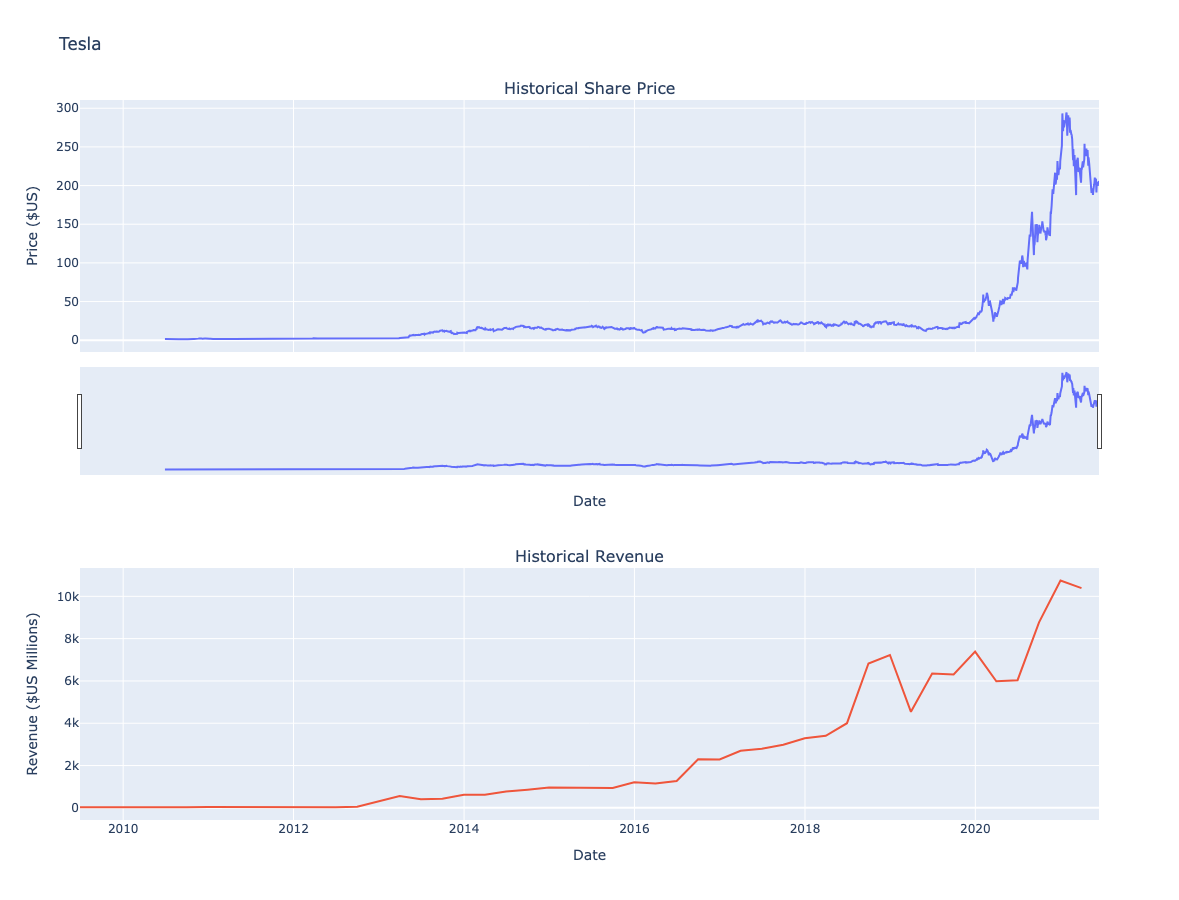

In [53]:
# Question 5

import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Die Funktion, die du bereits hast
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    
    # Nur Daten bis Juni 2021
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-06-14']
    
    # Aktienkurs-Daten hinzufügen
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    # Umsatz-Daten hinzufügen
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    # Achsentitel und Diagrammtitel hinzufügen
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                     height=900,
                     title=stock,
                     xaxis_rangeslider_visible=True)
    fig.show()

# Tesla-Aktien-Daten
tesla = yf.Ticker("TSLA")
tesla_share_price_data = tesla.history(period="max")

# Tesla-Aktien-Daten zurücksetzen (um den Index zu bereinigen)
tesla_share_price_data.reset_index(inplace=True)

# Plot erstellen
make_graph(tesla_share_price_data, tesla_revenue, 'Tesla')

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")


In [54]:
# Graph für GameStop erstellen
make_graph(gme_data, gme_revenue, 'GameStop')

TypeError: Invalid comparison between dtype=int64 and str

In [57]:
# Stelle sicher, dass die Date-Spalte als datetime interpretiert wird
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])


/tmp/ipykernel_3076/2698217052.py:20: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



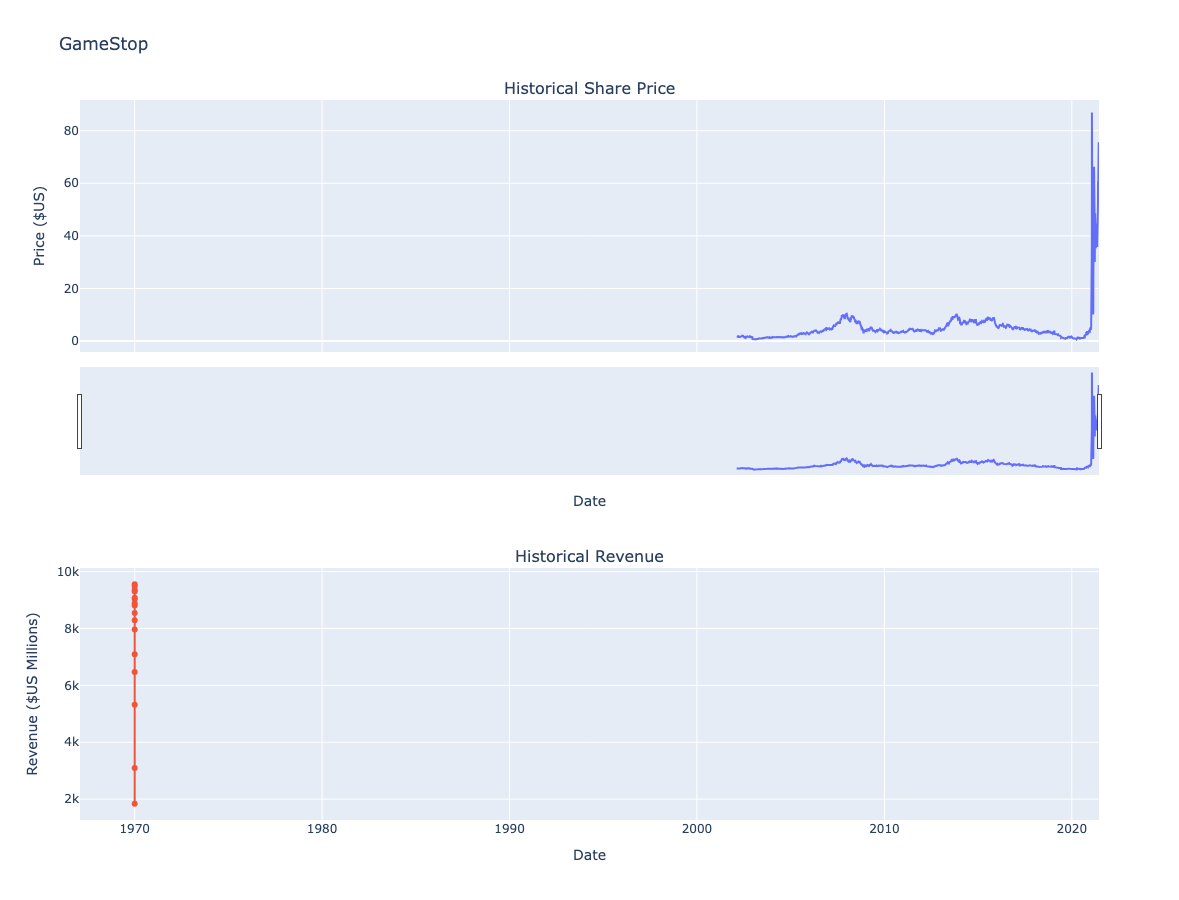

In [58]:
# Stelle sicher, dass die Date-Spalte als datetime interpretiert wird
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Filtere Daten bis Juni 2021
gme_data_specific = gme_data[gme_data['Date'] <= '2021-06-14']
gme_revenue_specific = gme_revenue[gme_revenue['Date'] <= '2021-06-14']

# Jetzt den Graphen erstellen
make_graph(gme_data_specific, gme_revenue_specific, 'GameStop')
